1.0) Python Libraries

In [5]:
%pip install --upgrade pip scikit-learn
%pip install --upgrade pip scikit-image

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage.transform import resize
from PIL import Image

#Define the network architecture
input_size = 3  # 2 principal components + 1 bias
hidden_size = 30  #hidden neurons
output_size = 3  #output classes
# Training the model
epochs = 1500
learning_rate = 0.001

1.1) Data testing/processing

In [7]:
# Load and preprocess images
def load_images(data_path, fruit_classes):
    images = []
    labels = []
    for idx, fruit in enumerate(fruit_classes):
        folder_path = os.path.join(data_path, fruit)
        #Debugging 1, making sure
        #print(f"Looking in folder: {folder_path}")
        for file_name in os.listdir(folder_path):
            #Debugging 2, making sure
            #print("Going in Here")
            #print(f"Looking in folder: {file_name}")
            image_path = os.path.join(folder_path, file_name)
            #Debugging 3, making sure
            #print(f"Looking in folder: {image_path}")
            #1. Resize, 
            #2. image to numpy array, 
            #3. flatten image
            
            with Image.open(image_path) as img:
                img = img.resize((img_height, img_width))  
                image_array = np.array(img) 
                images.append(image_array.flatten())  
                labels.append(idx)  

    #Return numpy array and label  of image 
    return np.array(images), np.array(labels)


# Define paths to the training data
data_path = "Data_train"
fruit_classes = ['Carambula', 'Lychee', 'Pear']

# Resize images to 100x100 for consistency
img_height, img_width = 100, 100  

#print(data_path)

# Load the training images
X_train, y_train = load_images(data_path, fruit_classes)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

#for matrix multi 
X_train_pca_with_bias = np.hstack((X_train_pca, np.ones((X_train_pca.shape[0], 1))))

# X_train_pca now contains the 2 principal components for each image
print(X_train_pca.shape)  
print(X_train_pca_with_bias.shape)  
#print(X_train)
#Output (1470, 2)

(1470, 2)
(1470, 3)


1.2) Cross-Entropy Loss Function

In [8]:
def cross_entropy_loss(y_true, y_pred):
    """
    y_true: true labels, one-hot encoded, shape (n_classes, n_samples)
    y_pred: predicted probabilities, shape (n_classes, n_samples)
    Add epsilon to avoid log(0)
    """
    m = y_true.shape[1]
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / m  
    return loss

def cross_entropy_derivative(y_true, y_pred):
    """
    y_true: true labels, one-hot encoded, shape (n_classes, n_samples)
    y_pred: predicted probabilities, shape (n_classes, n_samples)
    This is the gradient of the loss w.r.t the output of softmax
    """
    return y_pred - y_true  

# One-hot encode the labels
y_train_one_hot = np.zeros((output_size, len(y_train)))
y_train_one_hot[y_train, np.arange(len(y_train))] = 1

"""
#Testing from online source, shape (3, 3)
y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]).T  # One-hot encoded, 
y_pred = np.array([[0.7, 0.2, 0.1], [0.1, 0.5, 0.4], [0.2, 0.3, 0.5]]).T  # Predicted probabilities

loss = cross_entropy_loss(y_true, y_pred)
gradient = cross_entropy_derivative(y_true, y_pred)

print(f"Cross-Entropy Loss: {loss}")
print(f"Gradient: {gradient}")
"""

"""
Cross-Entropy Loss: 0.5809897683528744
Gradient: [[-0.3  0.1  0.2]
 [ 0.2 -0.5  0.3]
 [ 0.1  0.4 -0.5]]
"""

'\nCross-Entropy Loss: 0.5809897683528744\nGradient: [[-0.3  0.1  0.2]\n [ 0.2 -0.5  0.3]\n [ 0.1  0.4 -0.5]]\n'

1.3) Initialize weights and biases.

In [9]:
 # For reproducibility
np.random.seed(42) 
W1 = np.random.randn(hidden_size, input_size) * np.sqrt(2. / (input_size + hidden_size))
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * np.sqrt(2. / (hidden_size + output_size))
b2 = np.zeros((output_size, 1))

""""
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)
"""

#"""

"""
W1: [[ 0.24835708 -0.06913215  0.32384427]
 [ 0.76151493 -0.11707669 -0.11706848]
 [ 0.78960641  0.38371736 -0.23473719]
 [ 0.27128002 -0.23170885 -0.23286488]
 [ 0.12098114 -0.95664012 -0.86245892]]
b1: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
W2: [[-0.28114376 -0.50641556  0.15712367 -0.45401204 -0.70615185]
 [ 0.73282438 -0.11288815  0.0337641  -0.71237409 -0.27219136]
 [ 0.05546129 -0.57549679  0.18784901 -0.30031934 -0.14584687]]
b2: [[0.]
 [0.]
 [0.]]

"""

'\nW1: [[ 0.24835708 -0.06913215  0.32384427]\n[ 0.76151493 -0.11707669 -0.11706848]\n[ 0.78960641  0.38371736 -0.23473719]\n[ 0.27128002 -0.23170885 -0.23286488]\n[ 0.12098114 -0.95664012 -0.86245892]]\nb1: [[0.]\n[0.]\n[0.]\n[0.]\n[0.]]\nW2: [[-0.28114376 -0.50641556  0.15712367 -0.45401204 -0.70615185]\n[ 0.73282438 -0.11288815  0.0337641  -0.71237409 -0.27219136]\n[ 0.05546129 -0.57549679  0.18784901 -0.30031934 -0.14584687]]\nb2: [[0.]\n[0.]\n[0.]]\n\n'

1.4) the complete forward and backward pass + calculation of gradients

In [10]:
#Forward Pass
def sigmoid(z):
    """
    Compute the sigmoid activation for a given input.

    Args:
    z (np.array): Input array or scalar for which the sigmoid function is computed.

    Returns:
    np.array: Sigmoid activation output.
    """

    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    """
    Compute the derivative of the sigmoid function, used in backpropagation.

    Args:
    a (np.array): Output from the sigmoid function.

    Returns:
    np.array: Derivative of the sigmoid function.
    """

    return a * (1 - a)

def softmax(z):
    """
    Compute the softmax activation for a set of scores in logit form.

    Args:
    z (np.array): Array of logits where each column represents scores for one sample.

    Returns:
    np.array: Softmax probabilities for each class per sample.
    """
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / exp_z.sum(axis=0, keepdims=True)

def forward_pass(X, W1, b1, W2, b2):
    """
    Perform the forward pass of the neural network by computing the activations 
    from the input layer to the output layer.

    Args:
    X (np.array): Input data matrix, where each column represents one example.
    W1 (np.array): Weights matrix from input layer to hidden layer.
    b1 (np.array): Bias vector for hidden layer.
    W2 (np.array): Weights matrix from hidden layer to output layer.
    b2 (np.array): Bias vector for output layer.

    Returns:
    tuple of np.array: Tuple containing the activations from the hidden layer and the output layer.
    """
    Z1 = np.dot(W1, X.T) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return A1, A2
#################################################################################
#################################################################################

# Activation functions
def relu(z):
    
    return np.maximum(0, z)

def relu_derivative(a):
    """
    Compute the derivative of the ReLU function, used in backpropagation.

    Args:
    a (np.array): Output from the ReLU function.

    Returns:
    np.array: Derivative of the ReLU function.
    """
    return np.where(a > 0, 1, 0)

#################################################################################
#################################################################################

#Backward Pass + Gradient Calculation
def backward_pass(X, y, A1, A2, W1, b1, W2, b2, learning_rate=0.01):
    """
    Perform the backward pass of the neural network by computing the gradients
    and updating the model parameters.

    Args:
    X (np.array): Input data matrix.
    y (np.array): One-hot encoded true labels.
    A1 (np.array): Activations from the hidden layer.
    A2 (np.array): Output probabilities from the output layer.
    W1, W2 (np.array): Weight matrices for layers.
    b1, b2 (np.array): Bias vectors for layers.
    learning_rate (float): Learning rate for the update step.

    Returns:
    tuple: Updated weights and biases after one iteration of backpropagation.
    """
    m = X.shape[0]
    
    dZ2 = A2 - y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(A1)
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2


1.5) Implement a function to evaluate the model's accuracy.

In [11]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of the predictions.
    
    y_true: true labels, one-hot encoded, shape (n_classes, n_samples)
    y_pred: predicted probabilities, shape (n_classes, n_samples)
    
    Returns:
    accuracy: The proportion of correctly classified samples.
    """
    y_true_labels = np.argmax(y_true, axis=0)
    y_pred_labels = np.argmax(y_pred, axis=0)
    accuracy = np.mean(y_true_labels == y_pred_labels)
    
    return accuracy

# List to store loss values
loss_values_2_NN = []

for epoch in range(1, epochs + 1):
    # Forward pass
    A1, A2 = forward_pass(X_train_pca_with_bias, W1, b1, W2, b2)
    
    # Compute loss
    loss = cross_entropy_loss(y_train_one_hot, A2)
    loss_values_2_NN.append(loss)
    # Backward pass
    #learning_rate = 0.01 
    W1, b1, W2, b2 = backward_pass(X_train_pca_with_bias, y_train_one_hot, A1, A2, W1, b1, W2, b2, learning_rate)
    
    # Print loss and accuracy at intervals
    if epoch % 10 == 0 or epoch == 1:
        accuracy = compute_accuracy(y_train_one_hot, A2)
        print(f'Epoch {epoch}/{epochs}, Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%')

# Final evaluation
A1, A2 = forward_pass(X_train_pca_with_bias, W1, b1, W2, b2)
final_accuracy = compute_accuracy(y_train_one_hot, A2)
print(f'Final Training Accuracy: {final_accuracy * 100:.2f}%')

Epoch 1/1500, Loss: 10.8960, Accuracy: 40.68%
Epoch 10/1500, Loss: 7.0877, Accuracy: 61.16%
Epoch 20/1500, Loss: 3.5730, Accuracy: 67.62%
Epoch 30/1500, Loss: 4.3893, Accuracy: 61.63%
Epoch 40/1500, Loss: 2.2135, Accuracy: 64.15%
Epoch 50/1500, Loss: 1.9832, Accuracy: 70.95%
Epoch 60/1500, Loss: 1.8046, Accuracy: 69.12%
Epoch 70/1500, Loss: 2.4804, Accuracy: 69.73%
Epoch 80/1500, Loss: 2.5005, Accuracy: 72.59%
Epoch 90/1500, Loss: 1.1705, Accuracy: 66.12%
Epoch 100/1500, Loss: 1.1977, Accuracy: 68.16%
Epoch 110/1500, Loss: 6.9448, Accuracy: 60.48%
Epoch 120/1500, Loss: 2.4850, Accuracy: 64.97%
Epoch 130/1500, Loss: 0.9327, Accuracy: 70.34%
Epoch 140/1500, Loss: 0.7497, Accuracy: 71.02%
Epoch 150/1500, Loss: 1.1462, Accuracy: 65.58%
Epoch 160/1500, Loss: 1.0601, Accuracy: 72.38%
Epoch 170/1500, Loss: 0.7356, Accuracy: 72.04%
Epoch 180/1500, Loss: 1.0853, Accuracy: 66.46%
Epoch 190/1500, Loss: 1.1083, Accuracy: 67.35%
Epoch 200/1500, Loss: 0.7524, Accuracy: 67.14%
Epoch 210/1500, Loss: 0

Testing

In [12]:
test_data_path = "Data_test"

# Load the test images
X_test, y_test = load_images(test_data_path, fruit_classes)

# Apply PCA to the test data same as training data
X_test_pca = pca.transform(X_test)

# Add bias term to the test data same as training data
X_test_pca_with_bias = np.hstack((X_test_pca, np.ones((X_test_pca.shape[0], 1))))

# One-hot encode the test labels same as training data
y_test_one_hot = np.zeros((output_size, len(y_test)))
y_test_one_hot[y_test, np.arange(len(y_test))] = 1

#Testing model
A1_test, A2_test = forward_pass(X_test_pca_with_bias, W1, b1, W2, b2)
test_accuracy = compute_accuracy(y_test_one_hot, A2_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 82.53%


Training Loss curves for 2 Layer NN

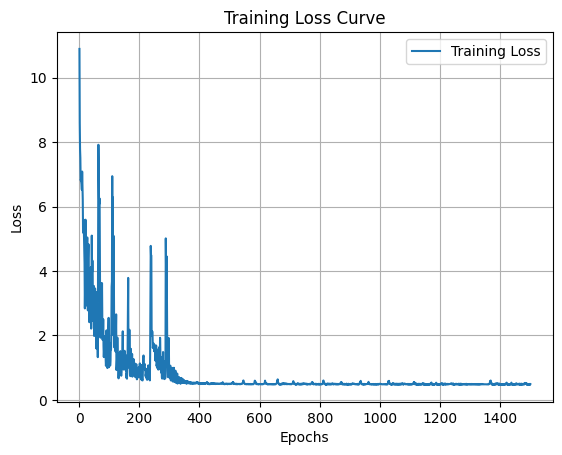

In [13]:
# Plotting the loss curve
plt.plot(range(1, epochs + 1), loss_values_2_NN, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

Plot decision regions for training / testing data for 2 Layer NN

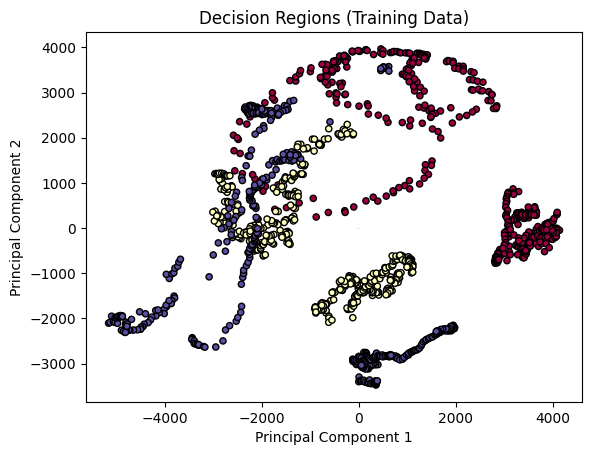

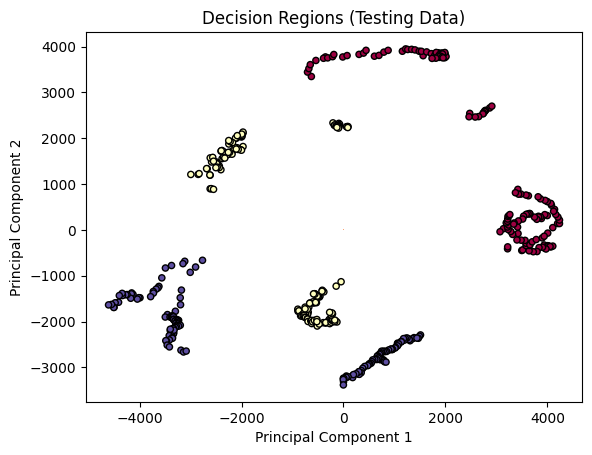

In [14]:
# Function to plot decision regions
def plot_decision_regions(X, y, W1, b1, W2, b2, title='Decision Regions'):
    # Define bounds of the grid with a limit to the range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # If the range is too large, reduce it to a manageable size
    x_min, x_max = max(x_min, -10), min(x_max, 10)
    y_min, y_max = max(y_min, -10), min(y_max, 10)
    
    # Create a meshgrid with a larger step size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),  
                         np.arange(y_min, y_max, 0.5))
    
    # Flatten the grid to pass through the model
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Add bias term to the grid
    grid_with_bias = np.hstack((grid, np.ones((grid.shape[0], 1))))
    
    # Predict on the grid
    _, Z = forward_pass(grid_with_bias, W1, b1, W2, b2)
    Z = np.argmax(Z, axis=0)
    Z = Z.reshape(xx.shape)
    
    # Plotting the decision regions
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=0), s=20, edgecolor='k', cmap=plt.cm.Spectral)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.show()

# Plotting decision regions for training data
plot_decision_regions(X_train_pca, y_train_one_hot, W1, b1, W2, b2, title='Decision Regions (Training Data)')

# Plotting decision regions for testing data
plot_decision_regions(X_test_pca, y_test_one_hot, W1, b1, W2, b2, title='Decision Regions (Testing Data)')

Part 2: 3 Layer NN

2.1) Set Variables

In [15]:
# Set random seed for reproducibility
np.random.seed(42)

#Some variables, play around with them if accuracy not good
input_size_3 = 3  # 2 principal components + 1 bias
#neurons in the first hidden layer
hidden_size_1_3 = 20  
 #neurons in the second hidden layer
hidden_size_2_3 = 10 
output_size_3 = 3

epochs = 1500
learning_rate = 0.0001

 Initialize weights and biases for 3 Layer NN

In [16]:
# Initialize weights and biases for the three-layer neural network
W1_3 = np.random.randn(hidden_size_1_3, input_size_3) * np.sqrt(2. / input_size_3)
b1_3 = np.zeros((hidden_size_1_3, 1))
W2_3 = np.random.randn(hidden_size_2_3, hidden_size_1_3) * np.sqrt(2. / hidden_size_1_3)
b2_3 = np.zeros((hidden_size_2_3, 1))
W3_3 = np.random.randn(output_size_3, hidden_size_2_3) * np.sqrt(2. / hidden_size_2_3)
b3_3 = np.zeros((output_size_3, 1))

Load in the data/PCA

In [17]:
#Load the data images
X_train_3, y_train_3 = load_images(data_path, fruit_classes)

#PCA 
pca_3 = PCA(n_components=2)
X_train_pca_3 = pca_3.fit_transform(X_train_3)
X_train_pca_with_bias_3 = np.hstack((X_train_pca_3, np.ones((X_train_pca_3.shape[0], 1))))

# One-hot encode the labels
y_train_one_hot_3 = np.zeros((output_size_3, len(y_train_3)))
y_train_one_hot_3[y_train_3, np.arange(len(y_train_3))] = 1


# One-hot encode the labels
y_train_one_hot = np.zeros((output_size, len(y_train_3)))
y_train_one_hot[y_train_3, np.arange(len(y_train_3))] = 1

Updated Functions for 3 Layer NN

In [18]:
#Better Relu functions, see report why
def leaky_relu_3(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)

def leaky_relu_derivative_3(a, alpha=0.01):
    return np.where(a > 0, 1, alpha)

# Forward pass for the three-layer neural network
def forward_pass_3(X, W1_3, b1_3, W2_3, b2_3, W3_3, b3_3):
    Z1_3 = np.dot(W1_3, X.T) + b1_3
    A1_3 = relu(Z1_3)
    Z2_3 = np.dot(W2_3, A1_3) + b2_3
    A2_3 = relu(Z2_3)
    Z3_3 = np.dot(W3_3, A2_3) + b3_3
    A3_3 = softmax(Z3_3)
    return A1_3, A2_3, A3_3

#Backward pass and gradient calculation for the three-layer neural network
#Added regularization rate
def backward_pass_3(X, y, A1_3, A2_3, A3_3, W1_3, b1_3, W2_3, b2_3, W3_3, b3_3, learning_rate=0.001, regularization_rate=0.001):
    m = X.shape[0]
    
    dZ3_3 = A3_3 - y
    dW3_3 = (np.dot(dZ3_3, A2_3.T) / m) + (regularization_rate * W3_3 / m)
    db3_3 = np.sum(dZ3_3, axis=1, keepdims=True) / m
    
    dA2_3 = np.dot(W3_3.T, dZ3_3)
    dZ2_3 = dA2_3 * leaky_relu_derivative_3(A2_3)
    dW2_3 = (np.dot(dZ2_3, A1_3.T) / m) + (regularization_rate * W2_3 / m)
    db2_3 = np.sum(dZ2_3, axis=1, keepdims=True) / m
    
    dA1_3 = np.dot(W2_3.T, dZ2_3)
    dZ1_3 = dA1_3 * leaky_relu_derivative_3(A1_3)
    dW1_3 = (np.dot(dZ1_3, X) / m) + (regularization_rate * W1_3 / m)
    db1_3 = np.sum(dZ1_3, axis=1, keepdims=True) / m

    W1_3 -= learning_rate * dW1_3
    b1_3 -= learning_rate * db1_3
    W2_3 -= learning_rate * dW2_3
    b2_3 -= learning_rate * db2_3
    W3_3 -= learning_rate * dW3_3
    b3_3 -= learning_rate * db3_3

    return W1_3, b1_3, W2_3, b2_3, W3_3, b3_3

Training for 3 Layer NN

In [19]:
#Save loss values for NN 
loss_values_3_NN = []
#Use the 3 Layer NN Functions
for epoch in range(1, epochs + 1):
    # Forward pass
    A1_3, A2_3, A3_3 = forward_pass_3(X_train_pca_with_bias_3, W1_3, b1_3, W2_3, b2_3, W3_3, b3_3)
    
    # Compute loss
    loss_3 = cross_entropy_loss(y_train_one_hot_3, A3_3)
    loss_values_3_NN.append(loss_3)
    
    # Backward pass
    W1_3, b1_3, W2_3, b2_3, W3_3, b3_3 = backward_pass_3(X_train_pca_with_bias_3, y_train_one_hot_3, A1_3, A2_3, A3_3, W1_3, b1_3, W2_3, b2_3, W3_3, b3_3, learning_rate)
    
    # Print loss and accuracy at intervals
    if epoch % 10 == 0 or epoch == 1:
        accuracy_3 = compute_accuracy(y_train_one_hot_3, A3_3)
        print(f'Epoch {epoch}/{epochs}, Loss: {loss_3:.4f}, Accuracy: {accuracy_3 * 100:.2f}%')

# Final Training Accuracy
A1_3, A2_3, A3_3 = forward_pass_3(X_train_pca_with_bias_3, W1_3, b1_3, W2_3, b2_3, W3_3, b3_3)
final_accuracy_3 = compute_accuracy(y_train_one_hot_3, A3_3)
print(f'Final Training Accuracy: {final_accuracy_3 * 100:.2f}%')

Epoch 1/1500, Loss: 12.3177, Accuracy: 33.13%
Epoch 10/1500, Loss: 6.8575, Accuracy: 61.90%
Epoch 20/1500, Loss: 5.9502, Accuracy: 66.80%
Epoch 30/1500, Loss: 6.6517, Accuracy: 63.67%
Epoch 40/1500, Loss: 6.1381, Accuracy: 65.92%
Epoch 50/1500, Loss: 5.5496, Accuracy: 69.25%
Epoch 60/1500, Loss: 5.5240, Accuracy: 65.37%
Epoch 70/1500, Loss: 5.5750, Accuracy: 65.17%
Epoch 80/1500, Loss: 6.1419, Accuracy: 63.61%
Epoch 90/1500, Loss: 4.4534, Accuracy: 65.92%
Epoch 100/1500, Loss: 5.4933, Accuracy: 63.61%
Epoch 110/1500, Loss: 2.2373, Accuracy: 76.60%
Epoch 120/1500, Loss: 2.7516, Accuracy: 72.52%
Epoch 130/1500, Loss: 1.9304, Accuracy: 75.51%
Epoch 140/1500, Loss: 3.8241, Accuracy: 65.71%
Epoch 150/1500, Loss: 2.9416, Accuracy: 73.13%
Epoch 160/1500, Loss: 1.6295, Accuracy: 73.81%
Epoch 170/1500, Loss: 2.9217, Accuracy: 69.52%
Epoch 180/1500, Loss: 2.2955, Accuracy: 68.71%
Epoch 190/1500, Loss: 1.4224, Accuracy: 72.86%
Epoch 200/1500, Loss: 1.7603, Accuracy: 75.31%
Epoch 210/1500, Loss: 2

Training Loss for 3 Layer NN

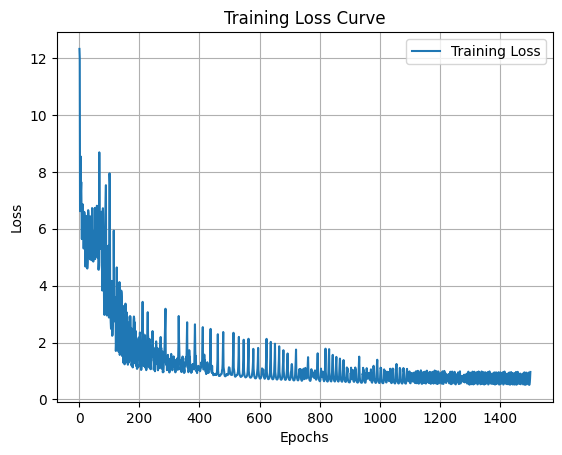

In [20]:
# Plotting the loss curve
plt.plot(range(1, epochs + 1), loss_values_3_NN, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

Testing 3 Layer NN

In [21]:
# Define paths to the test data
test_data_path = "Data_test"

# Load the test images
X_test_3, y_test_3 = load_images(test_data_path, fruit_classes)

# Same as above but with 3-Layer NN

X_test_pca_3 = pca_3.transform(X_test_3)

X_test_pca_with_bias_3 = np.hstack((X_test_pca_3, np.ones((X_test_pca_3.shape[0], 1))))


y_test_one_hot_3 = np.zeros((output_size_3, len(y_test_3)))
y_test_one_hot_3[y_test_3, np.arange(len(y_test_3))] = 1

#Final Test Accuracy
A1_test, A2_test, A3_test = forward_pass_3(X_test_pca_with_bias_3, W1_3, b1_3, W2_3, b2_3, W3_3, b3_3)
test_accuracy = compute_accuracy(y_test_one_hot_3, A3_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 81.93%


Plot decision regions for training / testing data for 3 Layer NN

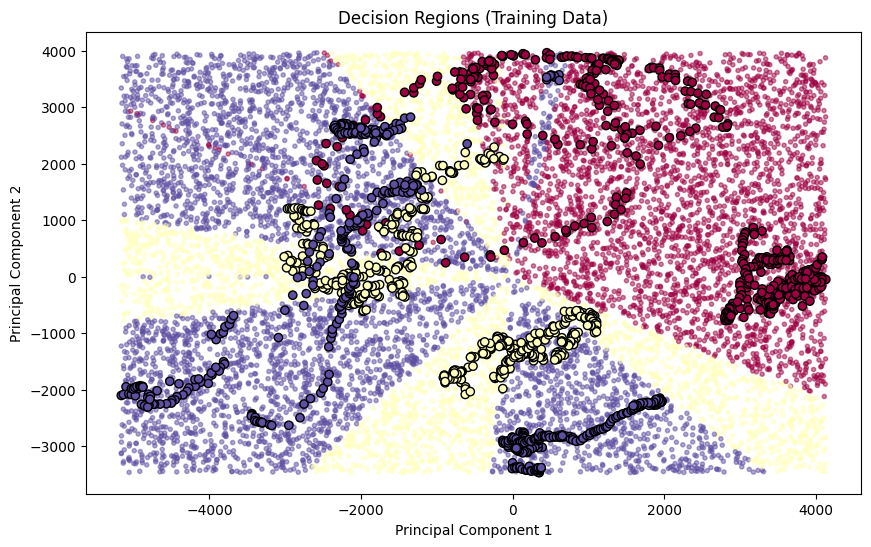

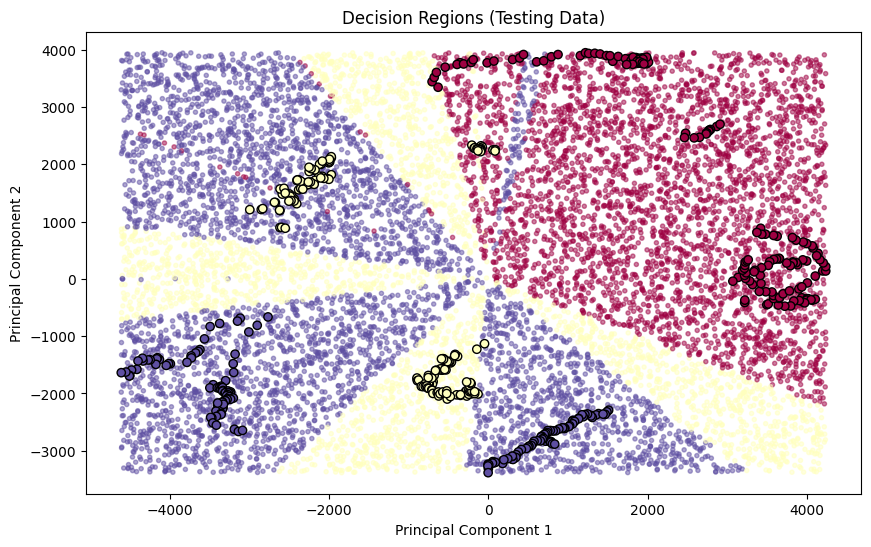

In [22]:
# Function to plot decision regions
def plot_decision_regions(X, y, W1, b1, W2, b2, W3, b3, title='Decision Regions'):
    # Define bounds of the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    total_points = 10000  # Total points to sample
    random_x = np.random.uniform(x_min, x_max, total_points)
    random_y = np.random.uniform(y_min, y_max, total_points)
    grid = np.column_stack((random_x, random_y, np.ones(total_points)))  # Including bias

    # Predict on the random points
    _, _, Z = forward_pass_3(grid, W1, b1, W2, b2, W3, b3)
    Z = np.argmax(Z, axis=0)

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(grid[:, 0], grid[:, 1], c=Z, alpha=0.5, cmap=plt.cm.Spectral, marker='.')
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=0), edgecolors='k', cmap=plt.cm.Spectral)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.show()

# Plotting decision regions for training data
plot_decision_regions(X_train_pca_3, y_train_one_hot_3, W1_3, b1_3, W2_3, b2_3, W3_3, b3_3, title='Decision Regions (Training Data)')

# Plotting decision regions for testing data
plot_decision_regions(X_test_pca_3, y_test_one_hot_3, W1_3, b1_3, W2_3, b2_3, W3_3, b3_3, title='Decision Regions (Testing Data)')

Part 4) Other dropout technique (2 NN)

In [23]:
#%pip uninstall torch
%pip install torch==2.3.0
#%pip install --upgrade torch ultralytics

Note: you may need to restart the kernel to use updated packages.


In [24]:
import torch
print(torch.__version__)  

2.3.0+cpu


In [25]:
%pip install tensorflow
#print(tensorflow.__version__)  

Note: you may need to restart the kernel to use updated packages.


In [26]:
import tensorflow as tf

#print("Shape of X_train_pca_with_bias:", X_train_pca_with_bias.shape)
#print("Shape of X_test_pca_with_bias:", X_test_pca_with_bias.shape)
#print("Shape of y_train:", y_train.shape)
#print("Shape of y_test:", y_test.shape)
X_train_pca_with_bias = X_train_pca_with_bias.astype('float32')
X_test_pca_with_bias = X_test_pca_with_bias.astype('float32')

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Ensure data types are correct and input shapes are explicitly declared
model.fit(X_train_pca_with_bias, y_train, epochs=500, validation_data=(X_test_pca_with_bias, y_test))


c:\Users\btuud\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5108 - loss: 249.6373 - val_accuracy: 0.7811 - val_loss: 47.3436
Epoch 2/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6234 - loss: 112.8725 - val_accuracy: 0.6827 - val_loss: 49.5793
Epoch 3/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6258 - loss: 99.5014 - val_accuracy: 0.7249 - val_loss: 37.1615
Epoch 4/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6240 - loss: 77.1659 - val_accuracy: 0.7530 - val_loss: 27.2659
Epoch 5/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6441 - loss: 68.4669 - val_accuracy: 0.7410 - val_loss: 31.5789
Epoch 6/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6521 - loss: 56.4206 - val_accuracy: 0.7530 - val_loss: 22.5500
Epoch 7/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6800 - loss: 37.8477 - val_accuracy: 0.8896 - val_loss: 14.7349
Epoch 8/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6568 - loss: 35.9380 - val_acc

In [27]:
%pip install torchvision

  Using cached torch-2.4.0-cp312-cp312-win_amd64.whl.metadata (27 kB)
Using cached torch-2.4.0-cp312-cp312-win_amd64.whl (197.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0
    Uninstalling torch-2.3.0:
      Successfully uninstalled torch-2.3.0
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the neural network architecture
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.output_layer = nn.Linear(128, output_size)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.output_layer(x)
        return x

# Convert your NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_pca_with_bias, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_pca_with_bias, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create Tensor datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64)

# Initialize the model, loss function, and optimizer
net = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop
net.train()
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Output training status
    print(f'Epoch {epoch + 1}, Loss: {loss.item():.4f}')

# Evaluate the model on test data
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


Epoch 1, Loss: 145.4439
Epoch 2, Loss: 82.1109
Epoch 3, Loss: 88.0699
Epoch 4, Loss: 75.7827
Epoch 5, Loss: 91.3170
Epoch 6, Loss: 27.1125
Epoch 7, Loss: 21.0655
Epoch 8, Loss: 27.5887
Epoch 9, Loss: 7.9996
Epoch 10, Loss: 15.5730
Epoch 11, Loss: 21.4377
Epoch 12, Loss: 9.3400
Epoch 13, Loss: 10.1591
Epoch 14, Loss: 18.6620
Epoch 15, Loss: 3.4594
Epoch 16, Loss: 7.5458
Epoch 17, Loss: 8.5921
Epoch 18, Loss: 4.1724
Epoch 19, Loss: 5.3166
Epoch 20, Loss: 5.2580
Epoch 21, Loss: 2.9051
Epoch 22, Loss: 8.0976
Epoch 23, Loss: 7.4774
Epoch 24, Loss: 4.7055
Epoch 25, Loss: 5.2515
Epoch 26, Loss: 12.9099
Epoch 27, Loss: 16.1015
Epoch 28, Loss: 5.6124
Epoch 29, Loss: 5.3633
Epoch 30, Loss: 4.5205
Epoch 31, Loss: 3.4100
Epoch 32, Loss: 4.2025
Epoch 33, Loss: 2.2430
Epoch 34, Loss: 3.3952
Epoch 35, Loss: 2.6277
Epoch 36, Loss: 2.9113
Epoch 37, Loss: 3.0007
Epoch 38, Loss: 4.7125
Epoch 39, Loss: 4.5575
Epoch 40, Loss: 3.7985
Epoch 41, Loss: 3.6362
Epoch 42, Loss: 7.0131
Epoch 43, Loss: 3.0880
Epoch

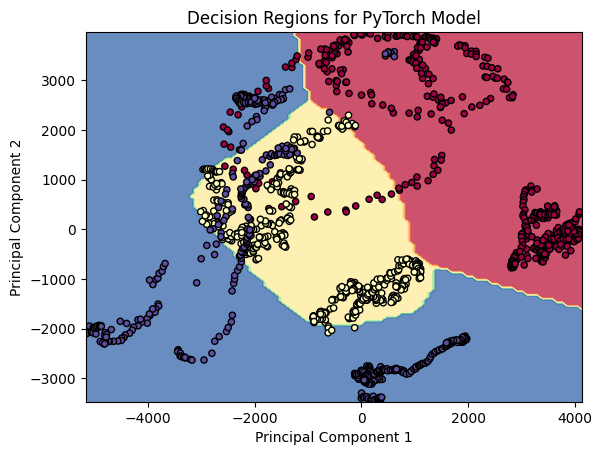

In [30]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def plot_decision_regions_pytorch(X, y, model, title='Decision Regions'):
    # Define bounds of the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Create a meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Flatten the grid to pass through the model
    grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)]  # Adding bias term
    
    # Convert grid to PyTorch tensor
    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    
    # Predict classes using the trained model
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        outputs = model(grid_tensor)
        Z = outputs.argmax(1).numpy().reshape(xx.shape)

    # Plotting decision regions
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.show()

# Prepare data for plotting
#  X_train_pca_with_bias and y_train are  training dataset and labels
# Convert the training data and labels to numpy arrays if they are in tensors
X_train_numpy = X_train_pca_with_bias.numpy() if isinstance(X_train_pca_with_bias, torch.Tensor) else X_train_pca_with_bias
y_train_numpy = y_train.numpy() if isinstance(y_train, torch.Tensor) else y_train

# Call the plotting function
plot_decision_regions_pytorch(X_train_numpy, y_train_numpy, net, title='Decision Regions for PyTorch Model')


Part 4) Other dropout technique (3 NN)

In [32]:
import tensorflow as tf

#print("Shape of X_train_pca_with_bias:", X_train_pca_with_bias_3.shape)
#print("Shape of X_test_pca_with_bias:", X_test_pca_with_bias_3.shape)
#print("Shape of y_train:", y_train_3.shape)
#print("Shape of y_test:", y_test_3.shape)
X_train_pca_with_bias_3 = X_train_pca_with_bias_3.astype('float32')
X_test_pca_with_bias_3 = X_test_pca_with_bias_3.astype('float32')

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(3,)),  # Input layer
    tf.keras.layers.Dropout(0.5),  # Dropout for regularization
    tf.keras.layers.Dense(output_size, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_pca_with_bias_3, y_train_3, epochs=500, validation_data=(X_test_pca_with_bias_3, y_test_3))

Epoch 1/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4478 - loss: 202.4099 - val_accuracy: 0.6667 - val_loss: 51.0846
Epoch 2/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5943 - loss: 110.5596 - val_accuracy: 0.7590 - val_loss: 35.4332
Epoch 3/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6116 - loss: 91.0125 - val_accuracy: 0.6767 - val_loss: 39.6894
Epoch 4/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6254 - loss: 70.9589 - val_accuracy: 0.7189 - val_loss: 27.8491
Epoch 5/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6468 - loss: 59.1391 - val_accuracy: 0.6988 - val_loss: 30.1006
Epoch 6/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6354 - loss: 54.3190 - val_accuracy: 0.6948 - val_loss: 23.9086
Epoch 7/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6709 - loss: 39.6892 - val_accuracy: 0.8855 - val_loss: 16.3692
Epoch 8/500
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6708 - loss: 34.7611 - val_ac

In [36]:
#Reuse old 2-layer NN model
#IMplement to 3-Layer NN model
class NeuralNet3(nn.Module):
    def __init__(self):
        super(NeuralNet3, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(128, 64)  # Second layer
        self.relu2 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.output_layer = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.dropout(x)
        x = self.output_layer(x)
        return x

# Convert your NumPy arrays to PyTorch tensors specifically for the 3-layer model
X_train_tensor_3 = torch.tensor(X_train_pca_with_bias_3, dtype=torch.float32)
y_train_tensor_3 = torch.tensor(y_train_3, dtype=torch.long)
X_test_tensor_3 = torch.tensor(X_test_pca_with_bias_3, dtype=torch.float32)
y_test_tensor_3 = torch.tensor(y_test_3, dtype=torch.long)

# Create Tensor datasets for the 3-layer network
train_dataset_3 = TensorDataset(X_train_tensor_3, y_train_tensor_3)
test_dataset_3 = TensorDataset(X_test_tensor_3, y_test_tensor_3)

# Define data loaders for the 3-layer network
train_loader_3 = DataLoader(dataset=train_dataset_3, batch_size=64, shuffle=True)
test_loader_3 = DataLoader(dataset=test_dataset_3, batch_size=64)

# Initialize the model, loss function, and optimizer for the 3-layer network
net_3 = NeuralNet3()  # Assuming NeuralNet3 is defined as 3-layer model class
criterion_3 = nn.CrossEntropyLoss()
optimizer_3 = optim.Adam(net_3.parameters(), lr=0.001)

# Training loop for the 3-layer network
net_3.train()
for epoch in range(epochs):  # Ensure 'epochs' is defined or specify the number directly
    for inputs, labels in train_loader_3:
        optimizer_3.zero_grad()
        outputs = net_3(inputs)
        loss = criterion_3(outputs, labels)
        loss.backward()
        optimizer_3.step()

    # Optionally print the training loss every few epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')

# Evaluate the 3-layer model on test data
net_3.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader_3:
        outputs = net_3(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_3 = 100 * correct / total
#print(correct)
#print(total)
print(f'Test Accuracy for 3-Layer NN: {accuracy_3:.2f}%')

Epoch 1/1500, Loss: 35.5016
Epoch 11/1500, Loss: 0.5779
Epoch 21/1500, Loss: 0.4938
Epoch 31/1500, Loss: 0.4945
Epoch 41/1500, Loss: 0.5117
Epoch 51/1500, Loss: 0.6160
Epoch 61/1500, Loss: 0.4813
Epoch 71/1500, Loss: 0.5311
Epoch 81/1500, Loss: 1.1800
Epoch 91/1500, Loss: 0.5152
Epoch 101/1500, Loss: 0.6112
Epoch 111/1500, Loss: 0.7430
Epoch 121/1500, Loss: 0.5743
Epoch 131/1500, Loss: 0.5918
Epoch 141/1500, Loss: 0.5229
Epoch 151/1500, Loss: 0.5250
Epoch 161/1500, Loss: 0.5010
Epoch 171/1500, Loss: 0.4950
Epoch 181/1500, Loss: 0.5486
Epoch 191/1500, Loss: 0.4830
Epoch 201/1500, Loss: 0.4321
Epoch 211/1500, Loss: 0.5465
Epoch 221/1500, Loss: 0.4476
Epoch 231/1500, Loss: 0.4469
Epoch 241/1500, Loss: 0.5710
Epoch 251/1500, Loss: 0.4769
Epoch 261/1500, Loss: 0.6897
Epoch 271/1500, Loss: 0.7225
Epoch 281/1500, Loss: 0.4908
Epoch 291/1500, Loss: 0.5138
Epoch 301/1500, Loss: 0.5096
Epoch 311/1500, Loss: 0.4331
Epoch 321/1500, Loss: 0.4703
Epoch 331/1500, Loss: 0.7795
Epoch 341/1500, Loss: 0.

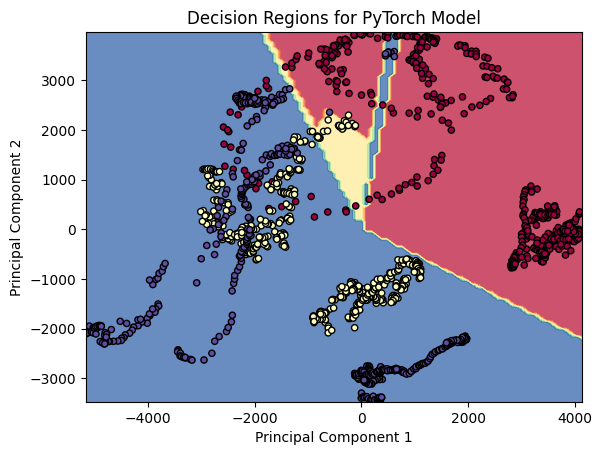

In [37]:
X_train_numpy_3 = X_train_pca_with_bias_3.numpy() if isinstance(X_train_pca_with_bias_3, torch.Tensor) else X_train_pca_with_bias
y_train_numpy_3 = y_train_3.numpy() if isinstance(y_train_3, torch.Tensor) else y_train_3

# Call the plotting function
plot_decision_regions_pytorch(X_train_numpy_3, y_train_numpy_3, net, title='Decision Regions for PyTorch Model')
